In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


In [2]:
glass = pd.read_csv('glass_/GLASS_matrix_alphabet_NNdt*_1and2and3chains.csv', sep=',', header=None)
y_glass = pd.read_csv('glass_/GLASS_y.csv')


In [3]:
soil = pd.read_csv('SOIL/soil-1-1_matrix_alphabet_NNdt*_1and2and3chains.csv', sep=',', header=None)
y_soil = pd.read_csv('SOIL/soil-1-1_y.csv')


# Линейная регрессия

In [4]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression(normalize=True)
scores = cross_val_score(lin_reg, glass, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

In [14]:
scores

array([-6.09564601e+00, -1.36852232e+26, -5.56245868e+21, -3.03286038e+23])

In [35]:
train_size = int(0.7 * glass.shape[0])

X_train = glass.loc[:, [0, 1]][:train_size]
print(X_train)
y_train = y_glass[:][:train_size]
X_test = glass[:][train_size:]
y_test = y_glass[:][train_size:]
lin_reg.fit(X_train, y_train)

      0    1
0   0.0  0.0
1   0.0  0.0
2   0.0  0.0
3   0.0  0.0
4   0.0  0.0
..  ...  ...
67  0.0  0.0
68  0.0  0.0
69  0.0  0.0
70  0.0  0.0
71  0.0  0.0

[72 rows x 2 columns]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
lin_reg.intercept_[0]

158.53731343283584

# Гребневая регрессия

In [15]:
from sklearn.linear_model import Ridge

In [99]:
ridge_scores = []
x = [0, 1, 10, 100, 500, 1000, 5000, 10000]
for a in x:
    ridge = Ridge(alpha=a)
    ridge_scores.append(cross_val_score(ridge, glass, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1))

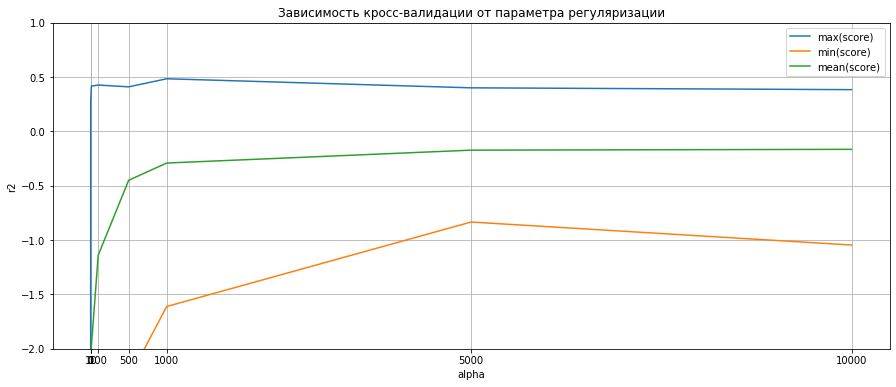

In [100]:
y1 = [max(row) for row in ridge_scores]
y2 = [min(row) for row in ridge_scores]
y3 = [row.mean() for row in ridge_scores]

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'max(score)')
ax.plot(x, y2, label = 'min(score)')
ax.plot(x, y3, label = 'mean(score)')
ax.legend()

ax.set_ylim(-2, 1)
# ax.set_xlim(0, 10000)
plt.xticks(x)

plt.title("Зависимость кросс-валидации от параметра регуляризации") # заголовок
plt.xlabel("alpha")         # ось абсцисс
plt.ylabel("r2")    # ось ординат
fig.set_figwidth(15)
fig.set_figheight(6)
plt.grid()              # включение отображение сетки
# plt.plot(x, y1, x, y2, x, y3)  # построение графика
plt.show()

## зависимость кросс-валидации от параметров регуляризации при нормализованных данных

In [90]:
ridge_scores = []
x = [ 1, 10, 100, 250, 500, 750, 1000]
for a in x:
    ridge = Ridge(alpha=a)
    ridge_scores.append(cross_val_score(ridge, preprocessing.normalize(glass), np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1))

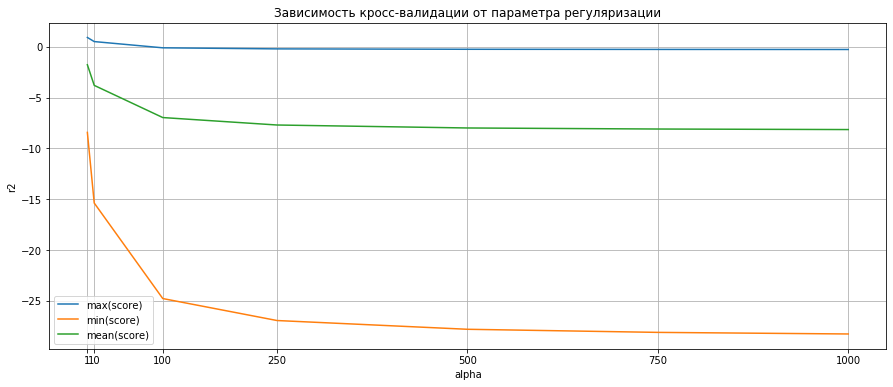

In [92]:
y1 = [max(row) for row in ridge_scores]
y2 = [min(row) for row in ridge_scores]
y3 = [row.mean() for row in ridge_scores]

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'max(score)')
ax.plot(x, y2, label = 'min(score)')
ax.plot(x, y3, label = 'mean(score)')
ax.legend()

# ax.set_ylim(-6, 1.5)
# ax.set_xlim(1, 1000)
plt.xticks(x)

plt.title("Зависимость кросс-валидации от параметра регуляризации") # заголовок
plt.xlabel("alpha")         # ось абсцисс
plt.ylabel("r2")    # ось ординат
fig.set_figwidth(15)
fig.set_figheight(6)
plt.grid()              # включение отображение сетки
# plt.plot(x, y1, x, y2, x, y3)  # построение графика
plt.show()

In [93]:
ridge = Ridge(alpha=1)
cross_val_score(ridge, preprocessing.normalize(glass), np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

array([-8.42329274, -0.37982927,  0.82013775,  0.91621765])

In [94]:
train_size = int(0.7 * glass.shape[0])

X_train = glass[:][:train_size]
y_train = y_glass[:][:train_size]
X_test = glass[:][train_size:]
y_test = y_glass[:][train_size:]

In [95]:
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [97]:
metrics.r2_score(y_test, ridge.predict(X_test))

-19.717554486825442

# Лассо

In [84]:
from sklearn import linear_model

In [106]:
x = [ 0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
lasso_scores = []
for a in x:
    lasso = linear_model.Lasso(alpha=a)
    lasso_scores.append(cross_val_score(lasso, glass, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1))

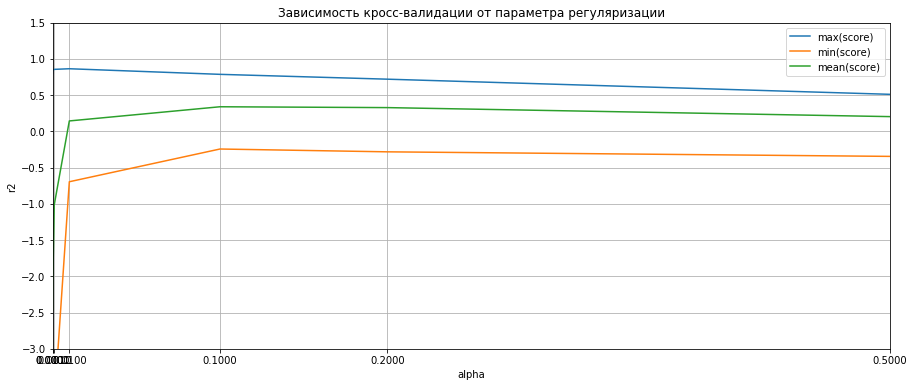

In [107]:
y1 = [max(row) for row in lasso_scores]
y2 = [min(row) for row in lasso_scores]
y3 = [row.mean() for row in lasso_scores]

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'max(score)')
ax.plot(x, y2, label = 'min(score)')
ax.plot(x, y3, label = 'mean(score)')
ax.legend()

ax.set_ylim(-3, 1.5)
ax.set_xlim(0, 0.5)
plt.xticks(x)

plt.title("Зависимость кросс-валидации от параметра регуляризации") # заголовок
plt.xlabel("alpha")         # ось абсцисс
plt.ylabel("r2")    # ось ординат
fig.set_figwidth(15)
fig.set_figheight(6)
plt.grid()              # включение отображение сетки
# plt.plot(x, y1, x, y2, x, y3)  # построение графика
plt.show()

# Попробуем использованные методы на 4х главых компонентах
Гребневая регрессия, Ненормализованные данные:

In [103]:
pca = PCA(n_components=4)
projection = pca.fit_transform(glass)

In [104]:
ridge = Ridge(alpha=5000)
cross_val_score(ridge, projection, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

array([-3.32147636,  0.28302175,  0.59478258, -0.01796069])

Гребневая регрессия, Нормализованные данные:

In [108]:
pca = PCA(n_components=4)
projection = pca.fit_transform(preprocessing.normalize(glass))
ridge = Ridge(alpha=500)
cross_val_score(ridge, projection, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

array([-27.75509189,  -3.11218969,  -0.7846187 ,  -0.24588379])

Регрессия Лассо, ненормализованные данные:

In [109]:
pca = PCA(n_components=4)
projection = pca.fit_transform(glass)
lasso = linear_model.Lasso(alpha=0.2)
cross_val_score(lasso, projection, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

array([-3.31865919,  0.28324907,  0.59481707, -0.02111108])

Регрессия Лассо, нормализованные данные:

In [110]:
pca = PCA(n_components=4)
projection = pca.fit_transform(preprocessing.normalize(glass))
lasso = linear_model.Lasso(alpha=0.2)
cross_val_score(lasso, projection, np.ravel(y_glass), cv=4, scoring='r2', n_jobs = -1)

array([-10.17347839,  -0.87622341,   0.78717469,   0.90030406])

## Логистическая регрессия

In [121]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
cross_val_score(logistic, preprocessing.normalize(glass), np.ravel(y_glass), cv=3, scoring='r2', n_jobs = -1)

/Users/Varya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([-0.2548858 ,  0.76284094, -0.38346535])

In [122]:
cross_val_score(logistic, glass, np.ravel(y_glass), cv=3, scoring='r2', n_jobs = -1)

/Users/Varya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([0.58834181, 0.51690369, 0.22202605])

In [119]:
logistic.fit(preprocessing.normalize(X_train), np.ravel(y_train))
print('score = ', metrics.r2_score(np.ravel(y_test), logistic.predict(preprocessing.normalize(X_test))))

score =  -1.2041048518107278


In [120]:
logistic.classes_

array([ 73.,  76.,  80.,  83.,  85.,  88.,  90.,  91.,  93.,  95.,  97.,
        98., 100., 101., 103., 105., 108., 111., 112., 115., 118., 119.,
       120., 121., 122., 123., 125., 126., 127., 128., 129., 130., 133.,
       135., 137., 142., 149., 150., 154., 160., 161., 167., 168., 170.,
       171., 176., 184., 186., 193., 213., 240., 243., 261., 338., 343.,
       363., 379., 406., 412., 417.])

На 4х главных компонентах:

In [126]:
pca = PCA(n_components=10)
projection = pca.fit_transform(preprocessing.normalize(glass))
cross_val_score(logistic, projection, np.ravel(y_glass), cv=3, scoring='r2', n_jobs = -1)

/Users/Varya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


array([-0.25083839,  0.74877134, -0.38977283])